In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Finding out min and max values for all columns except Outcome
df.aggregate({"Age":['min','max'],
              "Glucose":['min','max'],
              "BMI":['min','max'],
              "Pregnancies":['min','max'],
              "Insulin":['min','max'],
              "BloodPressure":['min','max'],
              "SkinThickness":['min','max'],
              "DiabetesPedigreeFunction":['min','max']

})

,Age,Glucose,BMI,Pregnancies,Insulin,BloodPressure,SkinThickness,DiabetesPedigreeFunction
min,21,0,0.0,0,0,0,0,0.078
max,81,199,67.1,17,846,122,99,2.420


In [ ]:
#Status-0 indicates negative and 1 positive
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
df['BMI'].value_counts()
# 11 enteries are 0

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [ ]:
df['BloodPressure'].value_counts()
# 35 values are 0

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [ ]:
df['Glucose'].value_counts()
#insignificant number of values are 0

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

In [ ]:
df['SkinThickness'].value_counts()
# 227 values are 0

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###There are no missing values

#DATA ANALYSIS

Columns:






*  Age: Integer, ranging from 21 to 81 years, representing the age of the individual.

* BMI: Float, ranging from 0.0 to 67.1, representing the Body Mass Index of the individual.


* Glucose: Integer, ranging from 0 to 199, representing the glucose level.

* Blood Pressure: Integer, ranging from 0 to 122, representing the Blood Pressure level.

* Skin Thickness: Integer, ranging from 0 to 99, representing the Skin Thickness level.  

*  Diabetes Pedigree function: Float, ranging from 0.078 to 2.420, representing the Body Mass Index of the individual.

* Outcome- tells us about the status wether they have diabeties or not. 0 indicates negative and 1 positive.





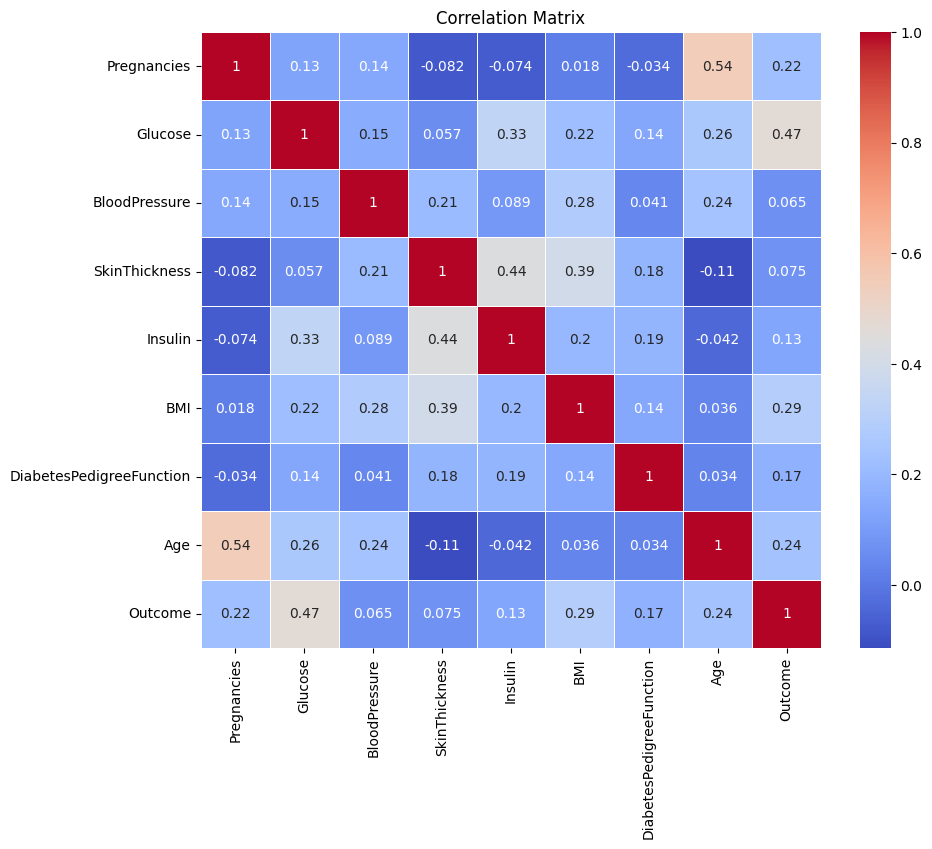

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#filling 0 values with median
median_Glucose = df[df["Outcome"] == 0]["Glucose"].median()
df.loc[(df["Outcome"] == 0) & (df["Glucose"] ==0), "Glucose"] = median_Glucose
df["Glucose"] = df["Glucose"].astype(int)
print(df['Glucose'].value_counts())
median_Glucose = df[df["Outcome"] == 1]["Glucose"].median()
df.loc[(df["Outcome"] == 1) & (df["Glucose"] ==0), "Glucose"] = median_Glucose
df["Glucose"] = df["Glucose"].astype(float)
print(df['Glucose'].value_counts())

Glucose
100    17
99     17
107    14
129    14
111    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
Glucose
99.0     17
100.0    17
125.0    14
111.0    14
106.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: count, Length: 135, dtype: int64


In [ ]:
mean_BloodPressure = df[df["Outcome"] == 0]["BloodPressure"].mean()
df.loc[(df["Outcome"] == 0) & (df["BloodPressure"] == 0), "BloodPressure"] = mean_BloodPressure
df["BloodPressure"] = df["BloodPressure"].astype(int)
print(df['BloodPressure'].value_counts())
mean_BloodPressure = df[df["Outcome"] == 1]["BloodPressure"].mean()
df.loc[(df["Outcome"] == 1) & (df["BloodPressure"] ==0), "BloodPressure"] = mean_BloodPressure
df["BloodPressure"] = df["BloodPressure"].astype(int)

BloodPressure
68     64
70     57
74     52
78     45
72     44
64     43
80     40
76     39
60     37
62     34
66     30
82     30
88     25
84     23
90     22
58     21
86     21
0      16
50     13
56     12
54     11
52     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
106     3
98      3
100     3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64


<ipython-input-16-76d7695f68bc>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '68.184' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["Outcome"] == 0) & (df["BloodPressure"] == 0), "BloodPressure"] = mean_BloodPressure
<ipython-input-16-76d7695f68bc>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '70.82462686567165' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["Outcome"] == 1) & (df["BloodPressure"] ==0), "BloodPressure"] = mean_BloodPressure


In [ ]:
df['Insulin'].value_counts()
# 374 values are 0

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

##Pre Processing

In [ ]:
#replacing incorrect 0 values with mean
mean_Insulin = df[df["Outcome"] == 0]["Insulin"].mean()
df.loc[(df["Outcome"] == 0) & (df["Insulin"] == 0), "Insulin"] = mean_Insulin
df["Insulin"] = df["Insulin"].astype(int)
mean_Insulin = df[df["Outcome"] == 1]["Insulin"].mean()
df.loc[(df["Outcome"] == 1) & (df["Insulin"] ==0), "Insulin"] = mean_Insulin
df["Insulin"] = df["Insulin"].astype(int)

<ipython-input-18-905611bdbaa1>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '68.792' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["Outcome"] == 0) & (df["Insulin"] == 0), "Insulin"] = mean_Insulin
<ipython-input-18-905611bdbaa1>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.33582089552239' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df["Outcome"] == 1) & (df["Insulin"] ==0), "Insulin"] = mean_Insulin


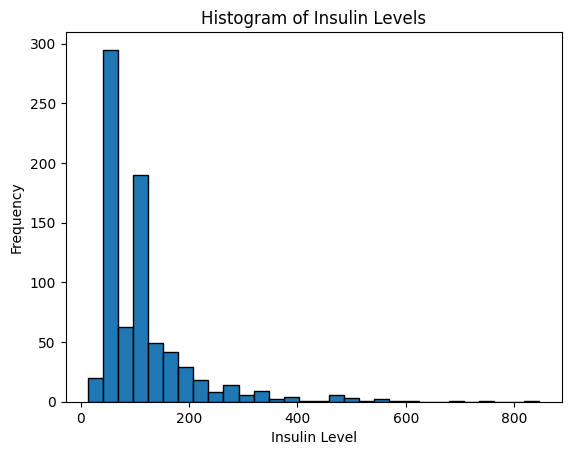

In [ ]:
plt.hist(df['Insulin'], bins=30, edgecolor='k')
plt.title('Histogram of Insulin Levels')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.show()

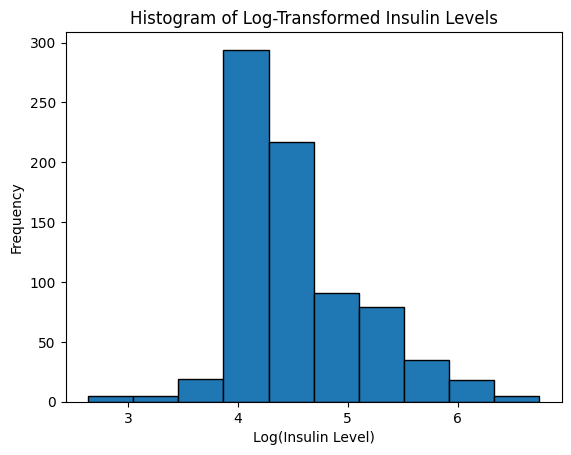

In [ ]:
# this is a right skewed data
# we will apply log transformation to make it gaussion
df['Insulin'] = np.log(df['Insulin'])
plt.hist(df['Insulin'], bins=10, edgecolor='k')
plt.title('Histogram of Log-Transformed Insulin Levels')
plt.xlabel('Log(Insulin Level)')
plt.ylabel('Frequency')
plt.show()

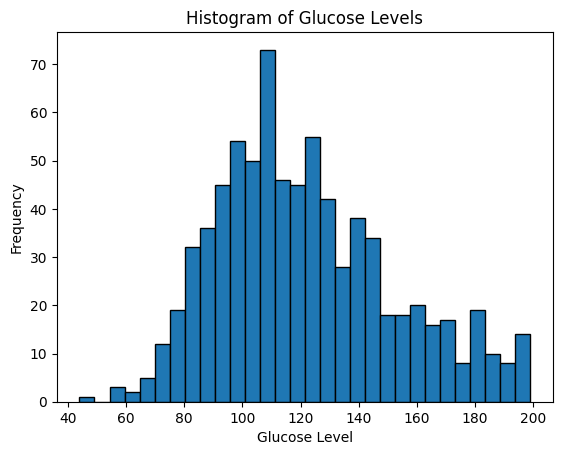

In [ ]:
plt.hist(df['Glucose'], bins=30, edgecolor='k')
plt.title('Histogram of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

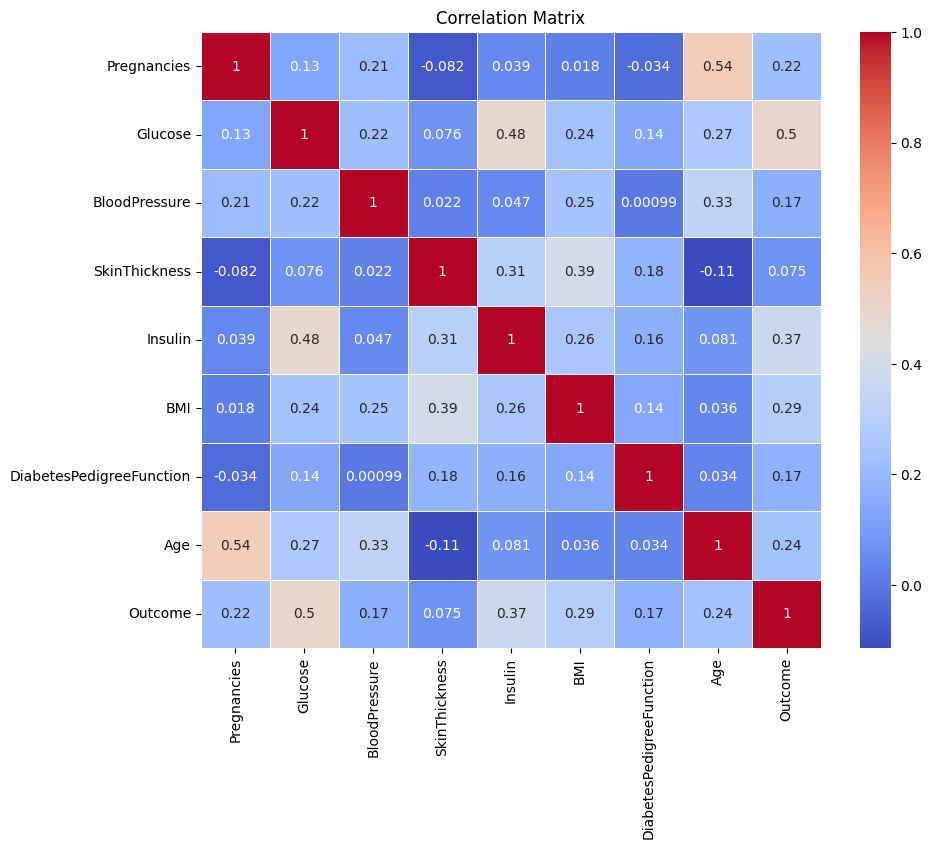

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
newdf=df.copy()
scaler=StandardScaler()
newdf.iloc[:,:-1]=scaler.fit_transform(newdf.iloc[:,:-1])
newdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.864625,-0.020318,0.907270,0.025656,0.204013,0.468492,1.425995,1
1,-0.844885,-1.204727,-0.515684,0.530902,-0.659794,-0.684422,-0.365061,-0.190672,0
2,1.233880,2.014265,-0.680807,-1.288212,0.025656,-1.103255,0.604397,-0.105584,1
3,-0.844885,-1.073339,-0.515684,0.154533,-0.084317,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.503310,-2.662273,0.907270,0.947726,1.409746,5.484909,-0.020496,1


##Model training

In [ ]:
#splitting into dependent and independent variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

from sklearn.model_selection import GridSearchCV
from sklearn import svm
params = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc=svm.SVC()
clf=GridSearchCV(svc,params)
clf.fit(x_train,y_train)
print(clf.best_params_)
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

{'C': 10, 'kernel': 'linear'}
0.7792207792207793


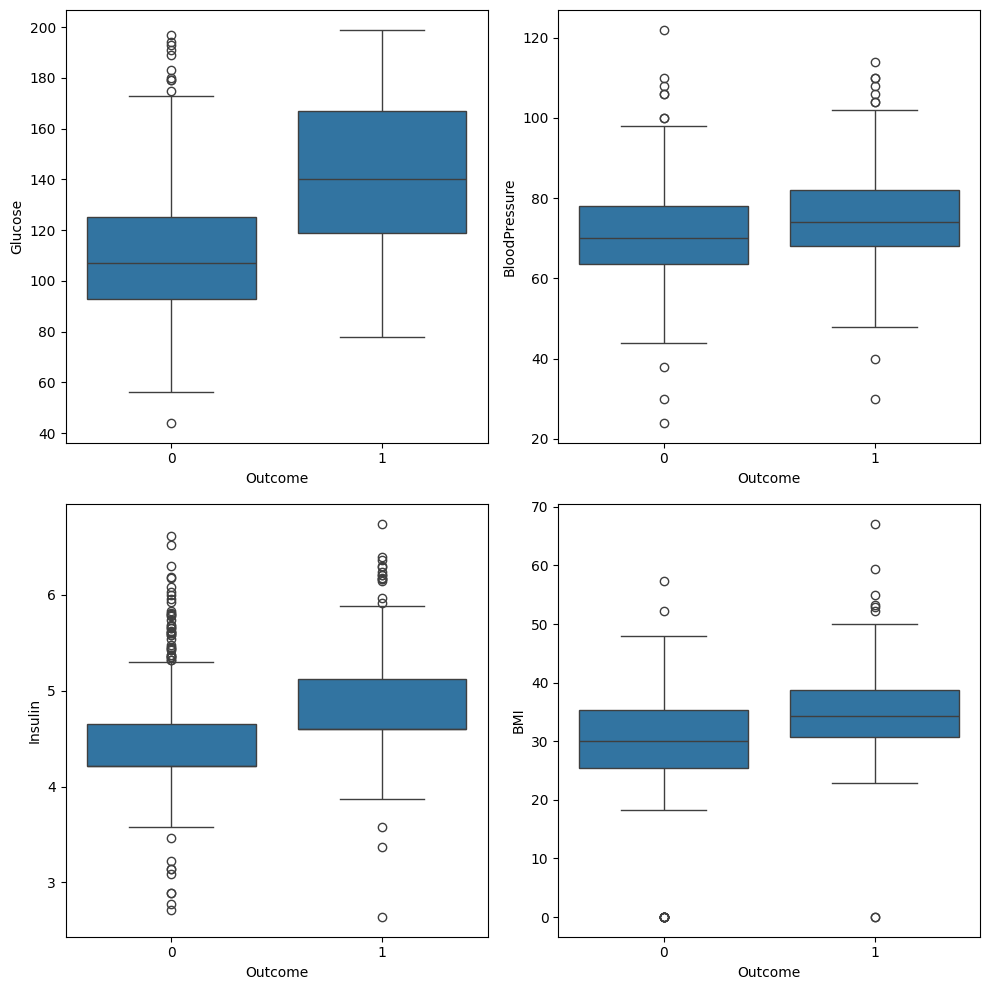

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(10, 10))
sns.boxplot(x='Outcome',y='Glucose', data=df,ax=axes[0,0])
sns.boxplot(x='Outcome',y='BloodPressure', data=df,ax=axes[0,1])
sns.boxplot(x='Outcome',y='Insulin', data=df,ax=axes[1,0])
sns.boxplot(x='Outcome',y='BMI', data=df,ax=axes[1,1])
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
predic=neigh.predict(x_test)
accuracy=neigh.score(x_test,y_test)
accuracy

0.6883116883116883

In [ ]:
print("New Shape: ", df.shape)
# Calculate the upper and lower limits
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Insulin'] >= upper)[0]
lower_array = np.where(df['Insulin'] <= lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
print("New Shape: ", df.shape)

New Shape:  (768, 9)
New Shape:  (729, 9)


In [ ]:
print("New Shape: ", df.shape)
# Calculate the upper and lower limits
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Glucose'] >= upper)[0]
lower_array = np.where(df['Glucose'] <= lower)[0]
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
print("New Shape: ", df.shape)

New Shape:  (729, 9)
New Shape:  (725, 9)


In [ ]:
print("New Shape: ", df.shape)
# Calculate the upper and lower limits
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['BloodPressure'] >= upper)[0]
lower_array = np.where(df['BloodPressure'] <= lower)[0]
df.drop(index=lower_array, inplace=True)
print("New Shape: ", df.shape)

New Shape:  (725, 9)
New Shape:  (721, 9)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
predic=neigh.predict(x_test)
accuracy=neigh.score(x_test,y_test)
accuracy

0.6883116883116883

###No change in accuracy of the model after scaling

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



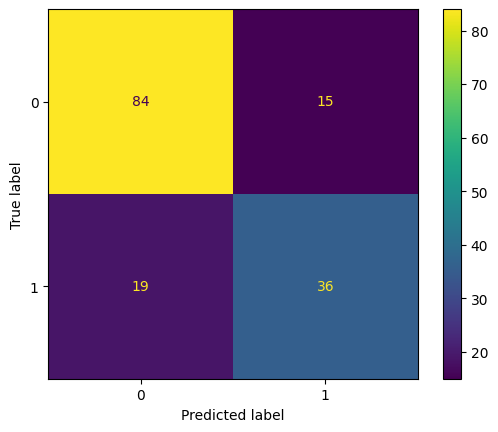

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
#displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=neigh.classes_)
disp.plot()

<ipython-input-33-285ac3366695>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))


Text(0, 0.5, 'Error Rate')

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

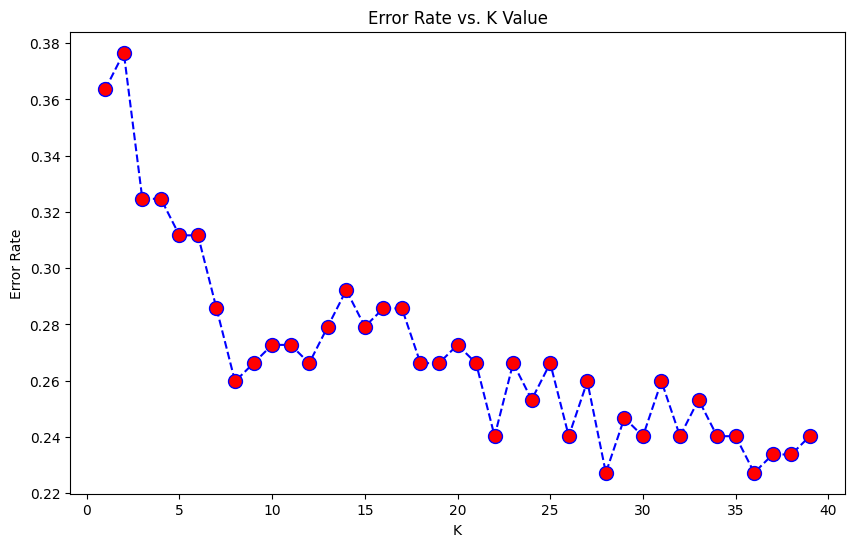

In [ ]:
#using error rate to find k neighbors
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=28)
neigh.fit(x_train, y_train)
y_pred=neigh.predict(x_test)
accuracy=neigh.score(x_test,y_test)
accuracy

0.7727272727272727

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



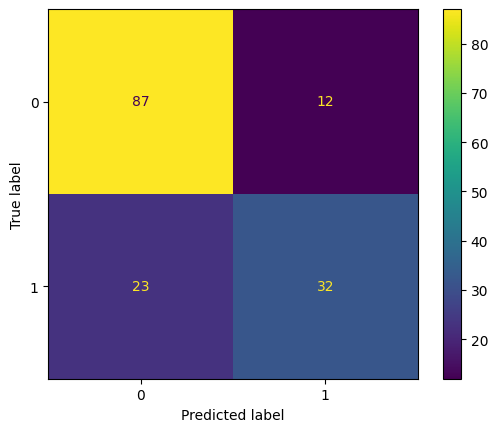

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
#displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=neigh.classes_)
disp.plot()

In [ ]:
#optimal value of k using gridsearchCV
param_grid = {'n_neighbors': range(1, 50)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(x_train, y_train)
accuracy = neigh.score(x_test, y_test)
print(accuracy)

{'n_neighbors': 42}
0.7792207792207793


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred2=rf.predict(x_test)
rf.fit(x_train, y_train)
accuracy = rf.score(x_test, y_test)
print(accuracy)

0.8896103896103896


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.8766233766233766


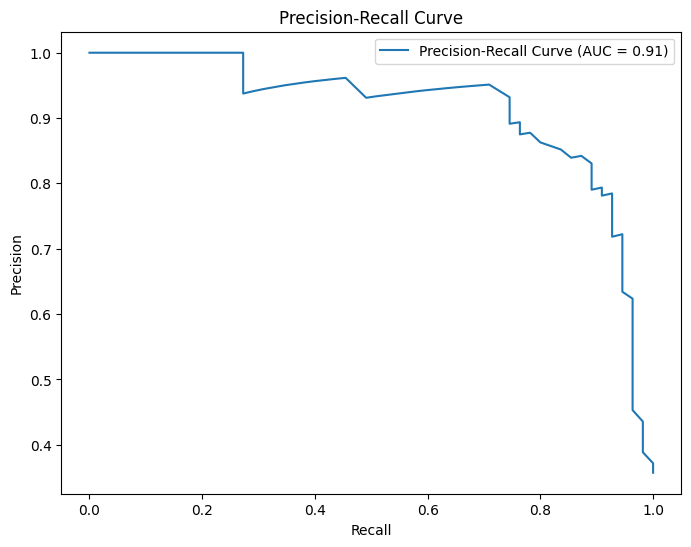

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# Predict probabilities for positive class
y_scores = rf.predict_proba(x_test)[:, 1]
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


##Best acuracy from Random Forest Model

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.85      0.84      0.84        55

    accuracy                           0.89       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.89      0.89      0.89       154



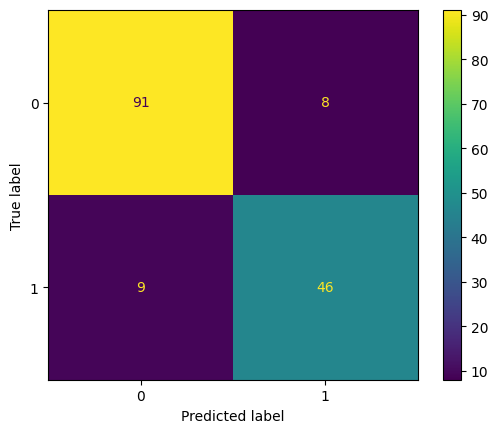

In [ ]:
print(classification_report(y_test,y_pred))
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred2)
#displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=neigh.classes_)
disp.plot()

In [ ]:
print(type(y_pred2))
print(type(y_test))
print(type(x_test))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
y_pred2=pd.Series(y_pred2,index=y_test.index,name='y_pred')
df_new=pd.concat([x_test,y_test.rename('y_test'),y_pred2],axis=1)
df_new.reset_index(drop=True,inplace=True)
df_new.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_test,y_pred
0,6,98.0,58,33,5.247024,34.0,0.430,43,0,0
1,2,112.0,75,32,4.219508,35.7,0.148,21,0,0
2,2,108.0,64,0,4.219508,30.8,0.158,21,0,0
3,8,107.0,80,0,4.219508,24.6,0.856,34,0,0
4,7,136.0,90,0,4.219508,29.9,0.210,50,0,0


In [ ]:
df_new.to_csv('Diabetes_classification.csv',header=True,index=True)

#Gradio

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
import gradio as gr
def classify_diabeties(Age,Glucose,BMI,Pregnancies,Insulin,BloodPressure,SkinThickness,DiabetesPedigreeFunction):
  input_data=np.array([Age,Glucose,BMI,Pregnancies,Insulin,BloodPressure,SkinThickness,DiabetesPedigreeFunction]).reshape(1,-1)
  prediction=rf.predict(input_data)
  if prediction[0]==0:
    return 'You are not diabetic'
  else:
    return 'You are diabetic'


interface=gr.Interface(
          fn=classify_diabeties,
          inputs=[
                 gr.Number(label='Age'),
                 gr.Number(label='Glucose'),
                  gr.Number(label='BMI'),
                  gr.Number(label='Pregnancies'),
                  gr.Number(label='Insulin'),
                  gr.Number(label='SkinThickness'),
                  gr.Number(label='DiabetesPedigreeFunction')],
          outputs="text",
          live=False,
          title="to check if you have diabeties"

          )

interface.launch( debug=True)



/usr/local/lib/python3.10/dist-packages/gradio/utils.py:986: UserWarning: Expected 8 arguments for function <function classify_diabeties at 0x7f48be56e560>, received 7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:990: UserWarning: Expected at least 8 arguments for function <function classify_diabeties at 0x7f48be56e560>, received 7.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://efd22645249ce9d2a1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
